<center>

# Relazione 1

</center>

In [28]:
import math
import numpy as np
import matplotlib.pyplot as plt

Per avere una stima delle incertezze dei risultati ottenuti dai vari calcoli verrà usato in questa esercitazione (ed in tutto il corso) il metodo della **media a blocchi**: ciò consente di associare degli errori, che è un must per ogni calcolo Monte-Carlo. Dato che questi sono i primi esercizi in cui viene utilizzato un tale metodo, riporto in seguito una breve spiegazione.
<br><br><br>

Supponiamo di avere ottenuto un numero $M$ di risultati e di dividerli in $N\,\lt\,M$ blocchi in modo tale che in ogni blocco siano presenti $L\,=\,M/N$ valori. Per ogni singolo blocco si calcola la media del blocco come: 
$$A_n\,=\,\frac{1}{L}\sum_{j=1}^{L} a_{j + (n-1)\cdot L}\,\quad\quad n\,\in\,[1,\,2,\dots,\,N-1,\,N]$$
Il valore aspettato può essere ottenuto allora come media delle medie effettuate nei singoli blocchi, ossia:
$$A\,=\,\frac{1}{N}\sum_{n=1}^{N}A_n$$
L'incertezza da associare al valore di aspettazione viene invece ricavata calcolando:
$$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{n=1}^N A^2_n \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{n=1}^N A_n \right)^2 $$
da cui si può ricavare l'errore sulla media:
$$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{n=1}^N A^2_n - \left( \frac{1}{N} \sum_{n=1}^N A_n \right)^2 \right]} $$

## <center> <span style="color:blue">Esercizio 1</span> </center>

L'obiettivo del primo esercizio è testare il generatore di numeri pseudo-casuali. I valori sono generati da un programma (si veda la cartella RANDOM_GEN) utilizzando un algoritmo deterministico. Un buon generatore di numeri casuali gode delle seguenti proprietà:
- Lungo periodo: la sequenza generata non dovrebbe mai ripetersi

- Uniformità: la sequenza generata dovrebbe coprire uniformemente l'intervallo $[0,\,1]$

- Efficienza

- Sequenze scorrelate: ogni sotto-sequenza dovrebbe essere non correlata con le altre

- Riproducibilità

Ciò che ci poniamo di fare è quindi di verificare se il nostro Pseudo-Random Generator gode di queste proprietà utilizzando diversi metodi. <br> <br>

### Punto 1

In primo luogo posso verificare se il valor medio dei numeri da noi generati è compatibile con quello teoricamente noto per una variabile aleatoria uniformemente distribuita nell'intervallo $\left[0,\,1\right]$. Esso risulta essere:

$$\langle r\rangle\,=\,\int_0^1 rdr\,=\,\frac{1}{2}$$

Per effettuare tale confronto sono stati generati $10^4$ valori divisi in 100 blocchi.

Stima finale: 0.50121 +/- 0.00307


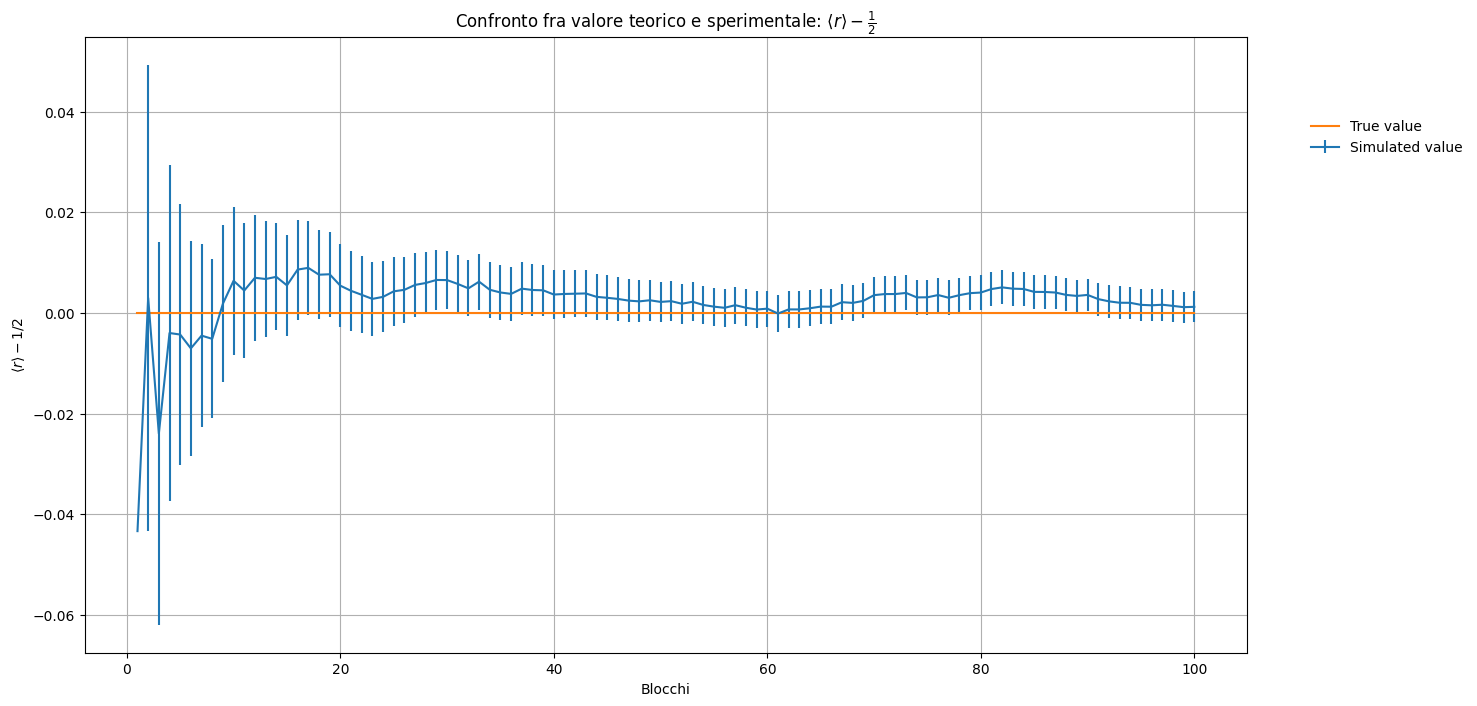

In [29]:
M=100000              # Numero totale di lanci 
N=100                 # Numero di blocchi
L=int(M/N)            # Lunghezza di ogni blocco

# Importo i valori generati con codice in C++
med_prog, devmed_prog = np.loadtxt("ESERCIZIO_1/MedieProg.dat", unpack=True)

fig, axes = plt.subplots(1, 1, figsize=(15, 8))

x = np.arange(1, N+1, 1) #Asse x del grafico
plt.errorbar(x,med_prog-0.5,yerr=devmed_prog, label = 'Simulated value')
plt.plot(x, np.zeros(len(x)), label = 'True value')
plt.legend(loc=(1.05, 0.8), frameon=False)

plt.xlabel('Blocchi')
plt.ylabel(r"$\langle r\rangle-1/2$")
plt.title(r'Confronto fra valore teorico e sperimentale: $\langle r \rangle - \frac{1}{2}$')
plt.grid(True)

print("Stima finale: " + str(round(med_prog[99], 5)) + " +/- " + str(round(devmed_prog[99], 5)))
plt.show()

Nel grafico precedente è riportata la differenza fra la media progressiva ed il true value: il valore teoricamente corretto (in colore arancione) è zero. Si nota come il valor medio ottenuto mediante simulazione risulta compatibile con quello vero: il test restituisce esito positivo.

### Punto 2

Si può anche osservare se la varianza dei dati generati è compatibile con il valor vero, che risulta essere:
$$\sigma^2 = \int_0^1 \left(r-\frac{1}{2}\right)^2 dr = \frac{1}{12}$$
Anche in questo caso ho lavorato con $10^4$ valori organizzati in 100 blocchi.

Stima finale: 0.08326 +/- 0.00079


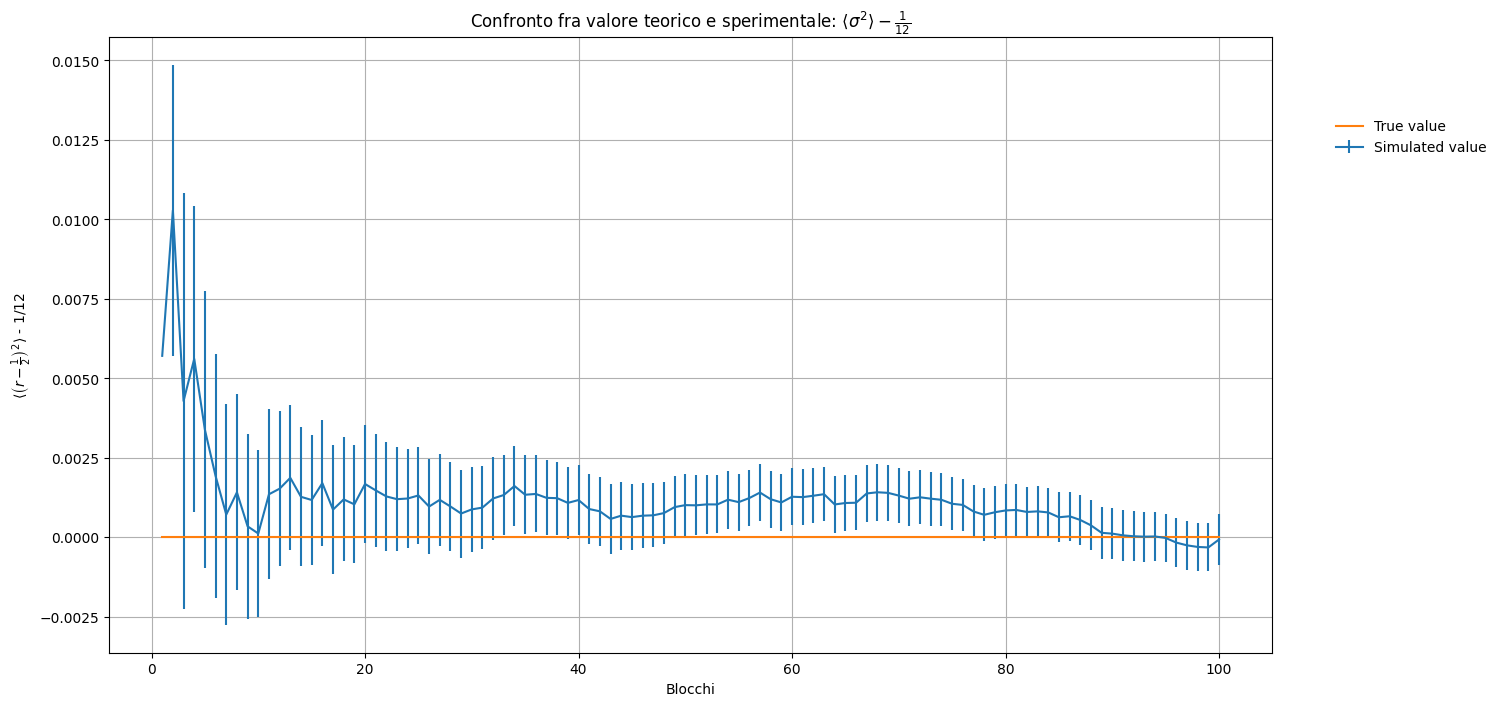

In [39]:
#Importo da file quanto calcolato mediante codice C++
var_prog, devvar_prog = np.loadtxt("ESERCIZIO_1/VarProg.dat", unpack=True)

fig, axes = plt.subplots(1, 1, figsize=(15, 8))

#Grafico quanto importato da file
plt.errorbar(x,var_prog-1/12,yerr=devvar_prog, label = 'Simulated value')
plt.plot(x, np.zeros(len(x)), label = 'True value')
plt.legend(loc=(1.05, 0.8), frameon=False)

plt.xlabel('Blocchi')
plt.ylabel(r'$\langle\left(r - \frac{1}{2}\right)^2\rangle$ - 1/12')
plt.title(r'Confronto fra valore teorico e sperimentale: $\langle\sigma^2\rangle - \frac{1}{12}$')
plt.grid(True)

print("Stima finale: " + str(round(var_prog[99], 5)) + " +/- " + str(round(devvar_prog[99], 5)))
plt.show()

Nel grafico precedente è riportata la differenza fra varianza progressiva e true value: il valore teorico (in arancione) è zero. Anche questo secondo test è passato dal generatore di numeri casuali con il quale stiamo lavorando.

### Punto 3

In questo caso performiamo un test del $\chi^2$. Supponiamo di aver eseguito N prove su un sistema: chiamiamo $o_j$ il numero di volte che viene osservato il valore della variabile entro un certo intervallo $[x_{j-1},\,x_j]$ ed e_j il valore atteso dato dalla probabilità ipotizzata (nel nostro caso quella uniforme). Una valutazione della discrepanza tra la distribuzione osservata e quella attesa è data dell'espressione:
$$\chi^2\,=\,\sum_j^{classi}\frac{(o_j\,-\,e_j)^2}{e_j}$$

Effettuo 100 stime di $\chi^2$ estraendo ogni volta $10^4$ valori con il metodo rnd.Rannyu() del generatore di numeri pseudo-casuali. Per tutte queste prove l'intervallo $[0,\,1]$ è diviso in $M\,=\,100$ sotto-intervalli di pari dimensione. Il numero di eventi aspettati in ogni sotto-intervallo in accordo con una distribuzione uniforme è: $n/M$ e ci aspetteremmo un valore di $\chi^2$ circa pari ad M.

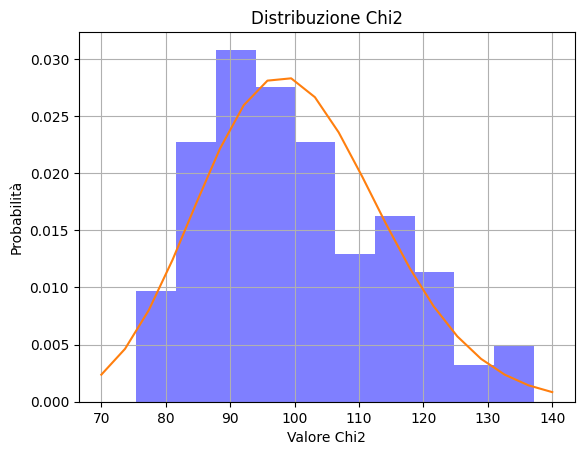

In [31]:
#Importo i valori di chi2 generati mediante codice c++
chi_2 = np.loadtxt("ESERCIZIO_1/Chi2.dat", unpack=True)

num_bins = 10
n, bins, patches = plt.hist(chi_2, num_bins, facecolor='blue', alpha=0.5, density=True)

#Disegno il chi2
from scipy.stats import chi2
# Gradi di libertà del chi quadro
df = 100

# Calcola i valori di x da plottare
x = np.linspace(70, 140, 20)

# Calcola i valori della distribuzione chi quadro
y = chi2.pdf(x, df)

# Traccia la distribuzione chi quadro
plt.plot(x, y)
plt.grid(True)


plt.xlabel('Valore Chi2')
plt.ylabel('Probabilità')
plt.title('Distribuzione Chi2')

plt.show()

Ciò che si osserva nel precedente grafico è una non totale compatibilità fra valori simulati (istogramma in blu) e $\chi^2$ teorico con 100 gradi di libertà (curva arancione). Il generatore di numeri casuali sfrutta un algoritmo deterministico che emula abbastanza correttamente quella che dovrebbe essere una distribuzione uniforme: possiamo proseguire utilizzando tale programma come base per i vari calcoli Monte-Carlo.

## <center> <span style="color:blue">Esercizio 2</span> </center>

Una volta appurato il buon funzionamento del Pseudo-Random Generator, vogliamo verificare la veridicità del teorema del limite centrale. Per fare questo è necessario aggiungere due metodi alla classe Random in modo tale da poter campionare una distribuzione esponenziale ed una Lorentziana: ciò si può fare utilizzando il **metodo dell'inversione della cumulativa**.

In [32]:
uniforme = np.loadtxt("ESERCIZIO_2/Uniforme.dat", unpack=True)
esponenziale = np.loadtxt("ESERCIZIO_2/Esponenziale.dat", unpack=True)
lorentziana = np.loadtxt("ESERCIZIO_2/Lorentziana.dat", unpack=True)

### Inversione della cumulativa

Consideriamo una variabile aleatoria con una generica distribuzione di probabilità $p(x)$. Sia inoltre $F(x)$ la distribuzione cumulativa associata a $p(x)$. Ciò che si osserva è che:
$$y\,=\,F(x)\,=\,\int_{-\infty}^x p(x_1)dx_1$$
è distribuita uniformemente. Se si ha che la cumulativa è nota ed invertibile è possibile campionare la $p(x)$. <br><br><br>

-----------------------------------------------------------------------------------------------------------------------------------------------
<br>
<center>Distribuzione esponenziale</center>

$$p(x)\,=\,\lambda exp(-\lambda x)$$
$$F(x)\,=\,\int_0^x\lambda exp(-\lambda x_1)dx_1\,=\,1\,-\,exp(-\lambda x)$$
$$x\,=\,-\frac{1}{\lambda}ln(1\,-\,y)$$


-----------------------------------------------------------------------------------------------------------------------------------------------
<br>
<center>Distribuzione Lorentziana</center>

$$p(x)\,=\,\frac{1}{\pi}\frac{\Gamma}{\Gamma^2\,+\,x^2} \quad \quad -\infty\,\lt\,x\,\lt\,+\infty$$
$$F(x)\,=\,\int_{-\infty}^x \frac{1}{\pi}\frac{\Gamma}{\Gamma^2\,+\,x_1^2} dx_1\,=\,\frac{1}{\pi}arctan\left(\frac{x}{\Gamma}\right)\,+\,\frac{1}{2}$$
$$x\,=\,\Gamma tan\left[\pi\left(y\,-\,\frac{1}{2}\right)\right]$$

Testo in seguito i metodi inseriti nella classe Random confrontando gli istogrammi ottenuti con la distibuzione vera.

Text(0.5, 0.98, 'Prova nuovi metodi')

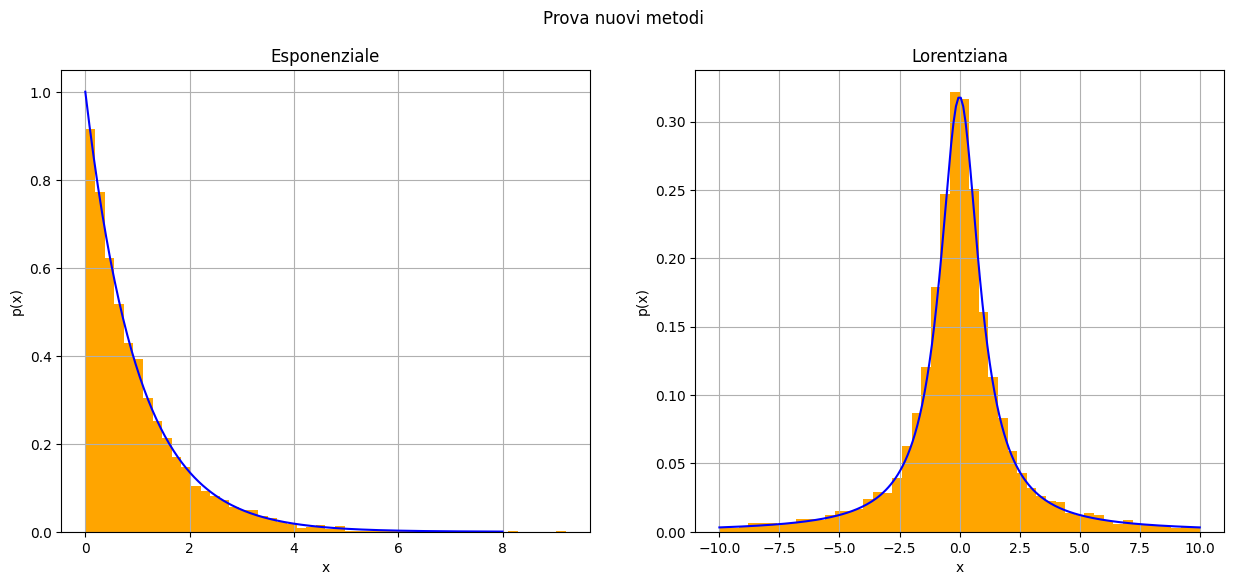

In [33]:
from scipy.stats import cauchy

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
titolo = np.array(['Esponenziale', 'Lorentziana'])

for i in range(0,2):

    if i==0:
        x = np.linspace(0, 8, 200)
        y = np.exp(-x)
        axes[i].hist(esponenziale[:, 0], bins=50, density=True, facecolor='orange')
        axes[i].plot(x, y, color = 'blue')


    else:
        x = np.linspace(-10, 10, 200)
        y = cauchy.pdf(x, 0, 1)
        axes[i].hist(lorentziana[:, 0], bins=50, density=True, facecolor='orange', range = (-10, 10))
        axes[i].plot(x, y, color = 'blue')

    axes[i].grid(True)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('p(x)')
    axes[i].set_title(titolo[i])

fig.suptitle('Prova nuovi metodi')


### Teorema del limite centrale

Dato che gli osservabili sono solitamente la somma di un gran numero di fenomeni randomici, risulta utile chiedersi quale sia la distribuzione della somma di variabili casuali. A questo quesito risponde il CLT.

<br>
<center>Central Limit Theorem</center>

Consideriamo N variabili casuali statisticamente indipendenti e identicamente distribuite $x_1,\,x_2,\,\dots,\,x_N$ per le quali si ha che:

$$p_N(x_1,\,x_2,\,\dots,\,x_N)\,=\,p(x_1)p(x_2)\dots p(x_N)$$ 

$$\langle x_1 \rangle\,=\,\langle x_2 \rangle\,=\,\dots\,=\,\langle x_N \rangle=\,\mu$$

$$\langle x_1^2 \rangle\,-\,\langle x_1 \rangle^2\,=\,\dots\,=\,\langle x_1^2 \rangle\,-\,\langle x_1 \rangle^2\,=\,\sigma^2$$

Consideriamo inoltre la somma di tali variabili aleatorie: $A_N\,=\,\frac{1}{N} \sum_{n=1}^N x_n$. Se sono rispettate le 3 richieste precedenti, ossia indipendenza, identica distribuzione e varianza nulla si ha che:

$$\langle A_N \rangle\,=\,\mu$$

$$\sigma^2_{A_N}\,=\,\frac{\sigma^2}{N}$$

$$P_N\left(A_N\right)\,\rightarrow\,\frac{1}{\sqrt{2\pi\sigma^2_{A_N}}}exp\left[-\frac{(A_N\,-\,\mu)^2}{2\sigma^2_{A_N}}\right]$$


<br><br><br>

La gaussaina è quindi la distribuzione a cui tende asintoticamente quella della somma di variabili aleatorie che rispettino le ipotesi del CLT. Non è tuttavia l'unico attrattore nello spazio delle distribuzioni di probabilità: la distribuzione di Cauchy-Lorentz $\left(\sigma^2\,=\,\infty\right)$ è infatti attrattrice di sè stessa.


### Distribuzione uniforme

La distribuzione uniforme campiona uniformemente l'intervallo $\left[0,\,1\right]$. Il valore medio e la varianza si calcolano come:

$$\langle r \rangle\,=\,\int_0^1 rdr\,=\,\frac{1}{2}$$

$$\sigma^2\,=\,\int_0^1 \left(r\,-\,\frac{1}{2}\right)^2dr\,=\,\frac{1}{12}$$

Nel seguente grafico sono riportate la distribuzione di partenza e quelle delle somme per $N\,=\,2,\,10,\,100$, con un confronto con le distribuzioni gaussiane predette dal CLT.

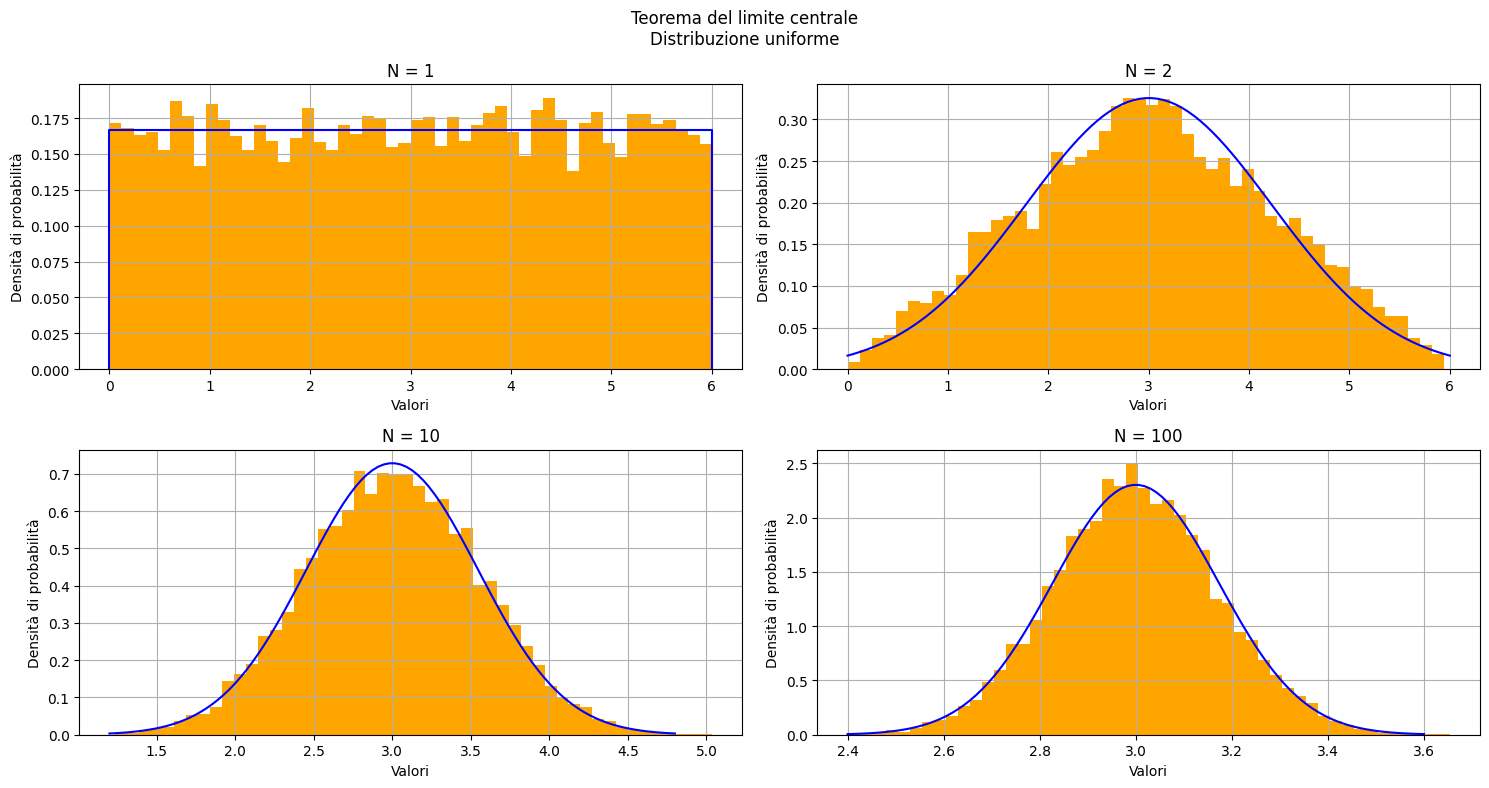

In [34]:
uniforme = 6 * np.loadtxt("ESERCIZIO_2/Uniforme.dat", unpack=True)
titoli = np.array([['N = 1', "N = 2"], ['N = 10', 'N = 100']])

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

#Distribuzioni CLT
mu = 3
sigm = np.array([0, math.sqrt(3/2), math.sqrt(3/10), math.sqrt(3/100)])
inf = np.array([0, 0, 1.2, 2.4])
sup = np.array([6, 6, 4.8, 3.6])


for i in range(0, 2):
    for j in range(0, 2):
        axes[i][j].hist(uniforme[:, 2*i + j], bins=50, density=True, facecolor='orange')

        if i==0 and j==0:
            axes[0][0].plot(np.array([0, 0, 6, 6]), np.array([0, 1/6, 1/6, 0]), color='blue')

        else:
            sigma = sigm[2*i + j]
            x = np.linspace(inf[2*i + j], sup[2*i + j], 100)
            y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
            
            axes[i][j].plot(x, y, color='blue')


        axes[j][i].grid(True)
        axes[j][i].set_xlabel('Valori')
        axes[j][i].set_ylabel('Densità di probabilità')
        axes[j][i].set_title(titoli[j][i])


fig.suptitle(f'Teorema del limite centrale\nDistribuzione uniforme')

plt.tight_layout()
plt.show()

Si nota come già con $N\,=\,2$ la distribuzione delle somme sia tutto sommato in buon accordo con quella teorica disegnata in blu: l'accuratezza aumenta all'aumentare di $N$.

### Distribuzione esponenziale

La distribuzione uniforme campiona uniformemente l'intervallo $\left[0,\,1\right]$. Il valore medio e la varianza si calcolano come:

$$\langle r \rangle\,=\,\int_0^{\infty} r\exp(-r)dr\,=\,1$$

$$\sigma^2\,=\,\int_0^1 \left(r\,-\,1\right)^2\exp(-r)dr\,=\,1$$

Nel seguente grafico sono riportate la distribuzione di partenza e quelle delle somme per $N\,=\,2,\,10,\,100$, con un confronto con le distribuzioni gaussiane predette dal CLT.

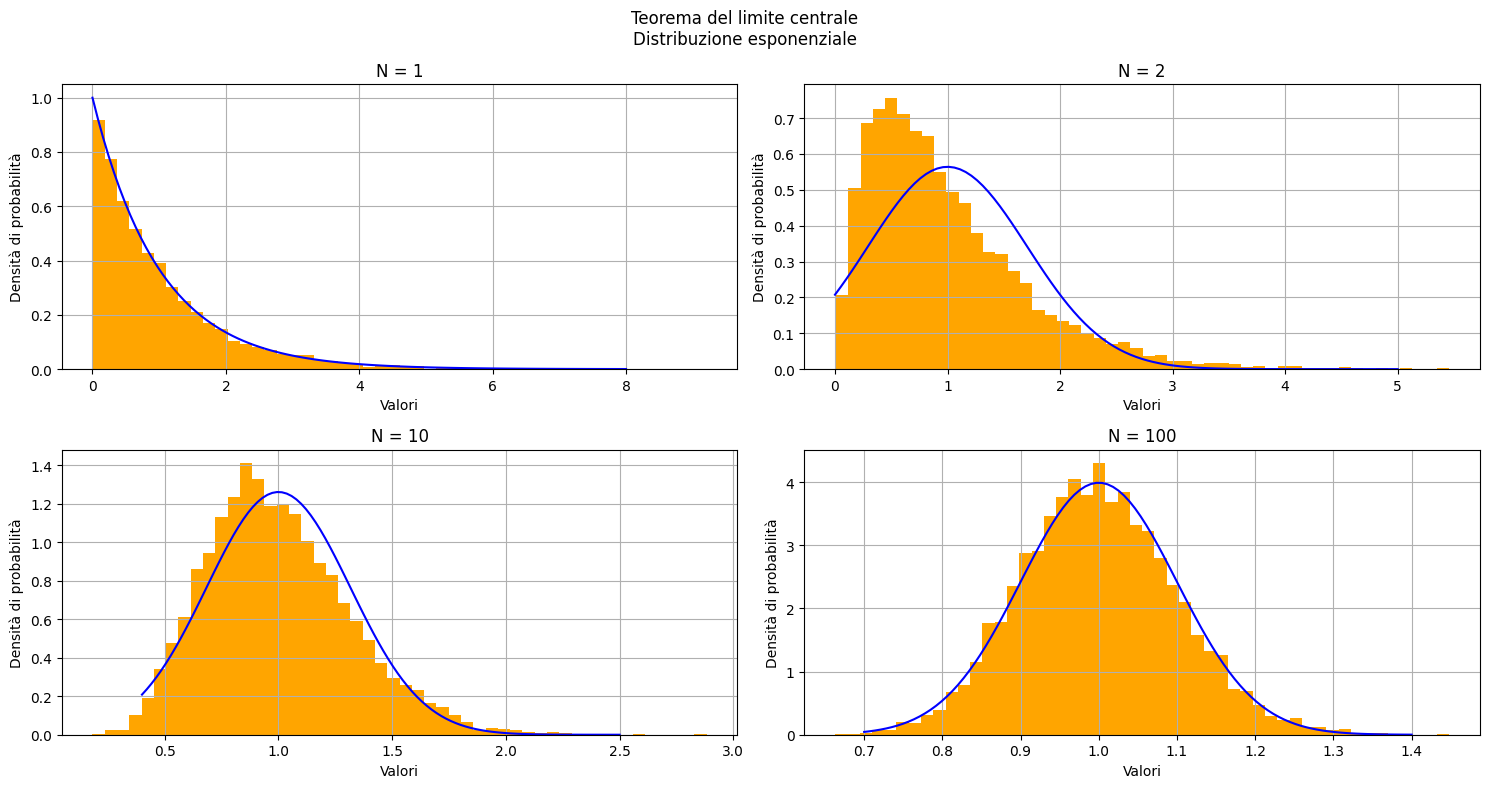

In [35]:
esponenziale = np.loadtxt("ESERCIZIO_2/Esponenziale.dat", unpack=True)
titoli = np.array([['N = 1', "N = 2"], ['N = 10', 'N = 100']])

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

#Distribuzioni CLT
mu = 1
sigm = np.array([0, math.sqrt(1/2), math.sqrt(1/10), math.sqrt(1/100)])
inf = np.array([0, 0, 0.4, 0.7])
sup = np.array([8, 5, 2.5, 1.4])

for i in range(0,2):
    for j in range(0,2):
        
        axes[i][j].hist(esponenziale[:, 2*i + j], bins=50, density=True, facecolor='orange')

        if i==0 and j==0:
            x = np.linspace(inf[2*i + j], sup[2*i + j], 100)
            y = np.exp(-x)

            axes[i][j].plot(x, y, color='blue')            

        
        else:
            sigma = sigm[2*i + j]
            x = np.linspace(inf[2*i + j], sup[2*i + j], 100)
            y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
            
            axes[i][j].plot(x, y, color='blue')            
            

        axes[i][j].grid(True)
        axes[i][j].set_xlabel('Valori')
        axes[i][j].set_ylabel('Densità di probabilità')
        axes[j][i].set_title(titoli[j][i])

fig.suptitle(f'Teorema del limite centrale\nDistribuzione esponenziale')

plt.tight_layout()
plt.show()

In questo caso noto che con un numero $N\,=\,2,\,N\,=\,10$ di variabili aleatorie sommate la distribuzione ottenuta si discosta abbastanza sensibilmente da quella gaussiana attesa. Questa incompatibilità non si presenta più aumentando il numero di variabili sommate (ossia grafico con $N\,=\,100$), come predetto dal CLT.

### Distribuzione di Cauchy - Lorentz

Consideriamo in questo caso una distribuzione del tipo:

$$p(x)\,=\,\frac{1}{\pi}\frac{1}{x^2\,+\,1}$$

Dato che la Lorentziana è attrattrice di se stessa ci aspettiamo che le distribuzioni delle somme non varino troppo da quella di partenza.

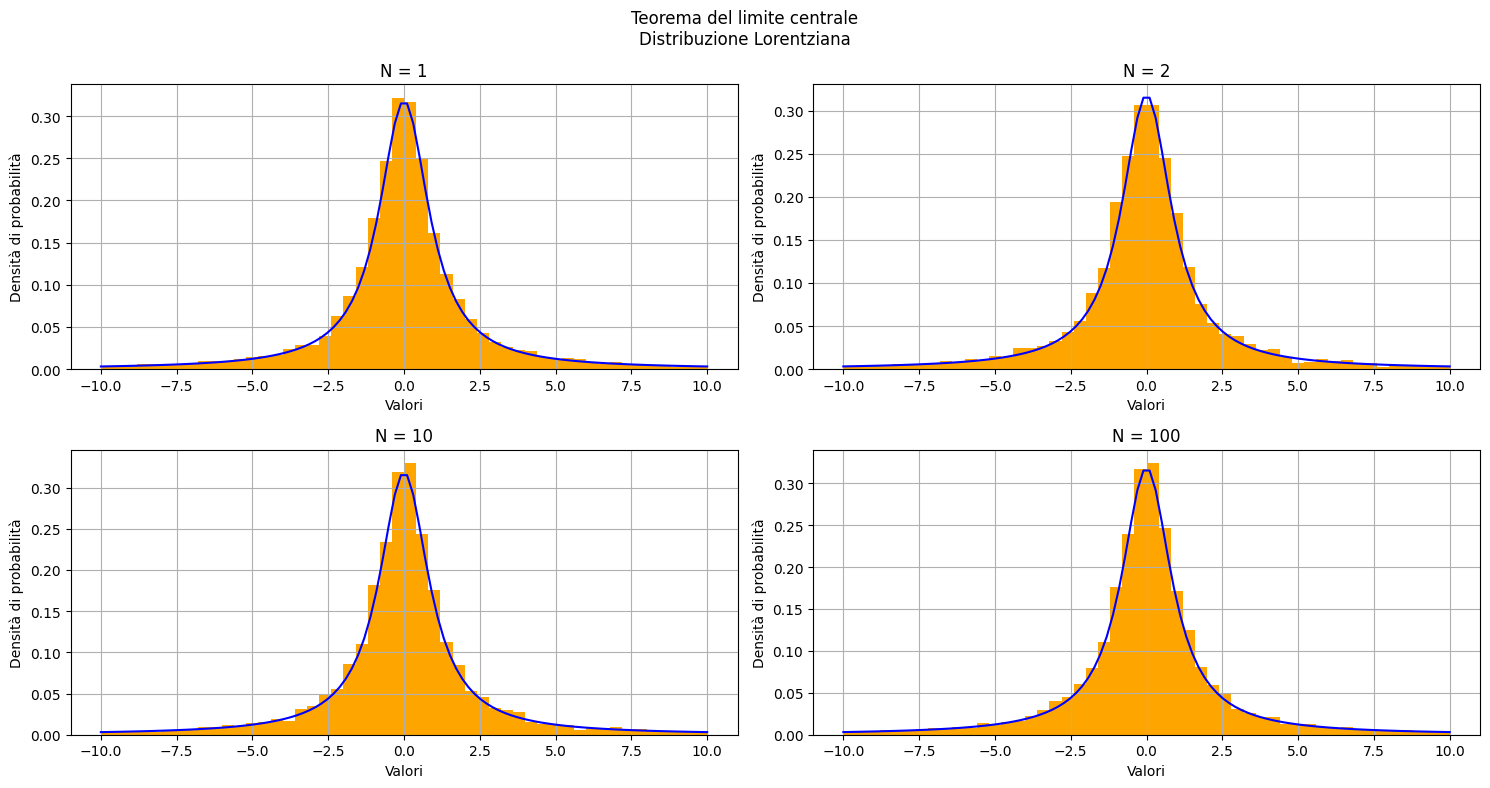

In [36]:
from scipy.stats import cauchy

lorentziana = np.loadtxt("ESERCIZIO_2/Lorentziana.dat", unpack=True)
titoli = np.array([['N = 1', "N = 2"], ['N = 10', 'N = 100']])

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Parametri della lorentziana
x0 = 0  # posizione del picco
gamma = 1  # larghezza della lorentziana


for i in range(0,2):
    for j in range(0,2):

        x = np.linspace(-10, 10, 100)
        y = cauchy.pdf(x, loc=x0, scale=gamma)

        axes[i][j].plot(x, y, color = 'blue')
        axes[i][j].hist(lorentziana[:, 2*i + j], bins=50, density=True, facecolor='orange', range =(-10, 10))

        axes[i][j].grid(True)
        axes[i][j].set_xlabel('Valori')
        axes[i][j].set_ylabel('Densità di probabilità')
        axes[j][i].set_title(titoli[j][i])



fig.suptitle(f'Teorema del limite centrale\nDistribuzione Lorentziana')

plt.tight_layout()
plt.show()

## <span style="color:blue">Esercizio 3</span>

Nel terzo esercizio si simula l'esperimento di Buffon, che consente di effettuare una stima del valore di $\pi$.

### Esperimento di Buffon

L'esperimento è stato proposto nel 1777 dal Conte di Buffon. Un ago di lunghezza $L$ è lanciato a caso su un piano orizzontale sul quale sono disegnate delle linee rette distanti le une dalle adiacenti $d\,\gt\,L$. La probabilità che un ago incroci una di queste linee è pari a:
$$P\,=\,\frac{2L}{\pi d}$$
Performando una simulazione dell'esperimento è quindi possibile stimare il valore di $\pi$ come segue:
$$\pi\,=\,\frac{2L}{Pd}\,=\,\lim_{N \to \infty} \frac{2LN}{Md}$$

In seguito lavoro con 100 blocchi da 100000 lanci ciascuno.

Stima finale: 3.15144 +/- 0.02482


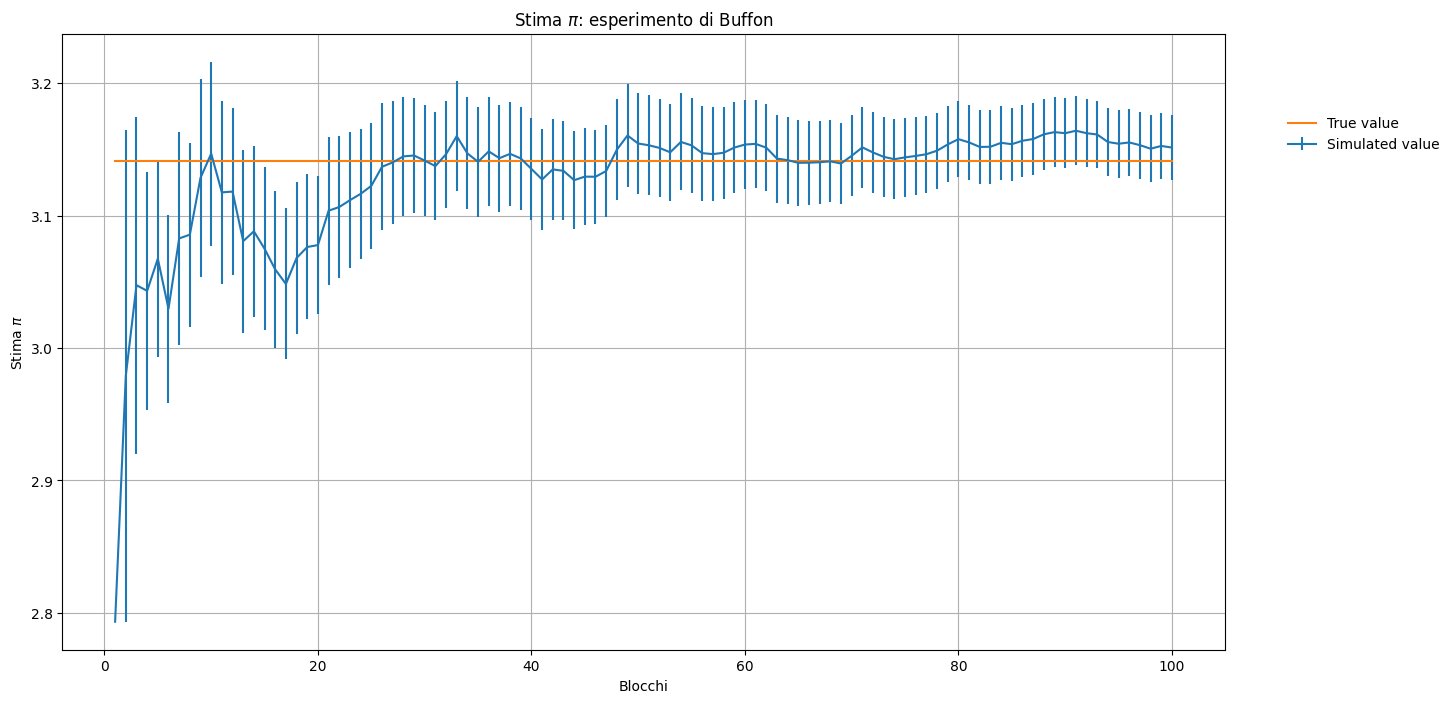

In [40]:
#Importo da file quanto calcolato mediante codice C++
pi_prog, devpi_prog = np.loadtxt("ESERCIZIO_3/Buffon.dat", unpack=True)
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

N = 100
n_throws = 100000

x = np.arange(1, N+1, 1)

#Grafico quanto importato da file
plt.errorbar(x,pi_prog,yerr=devpi_prog, label = 'Simulated value')
plt.plot(x, np.array([math.pi for i in range(0, len(x))]), label = 'True value')
plt.legend(loc=(1.05, 0.8), frameon=False)

plt.xlabel('Blocchi')
plt.ylabel(r'Stima $\pi$')
plt.title(r'Stima $\pi$: esperimento di Buffon')
plt.grid(True)

print("Stima finale: " + str(round(pi_prog[99], 5)) + " +/- " + str(round(devpi_prog[99], 5)))
plt.show()

Noto che l'esperimento consente di stimare correttamente il valore di $\pi$: il valore ottenuto a fine simulazione è compatibile con quello vero a meno di un sigma.

### Metodo Hit/Miss

Un'altra modalità con cui si può stimare il valore di $\pi$ è quella dell'Hit/Miss. Si considera una circoferenza di raggio unitario ed il quadrato circoscritto avente i lati paralleli agli assi principali. Si generano delle coordinare random nel quadrato: se i punti così ottenuti si trovano anche nel cerchio si aggiorna un contatore. La stima di $\pi$ si ha come:
$$\pi\,=\,\lim_{N \to \infty} \frac{n}{N}l^2$$
dove $l$ è il lato del quadrato (ossia 2) ed invece n è il numero di punti generati anche all'interno del cerchio. Un esempio di Hit/Miss è fornito dalla seguente immagine:

<center>

![Alt text](IMMAGINI/HitMiss.png)

</center>

La stima in questo caso viene ottenuta con 100 blocchi da 100000 lanci ciascuno:

Stima finale: 3.14796 +/- 0.00529


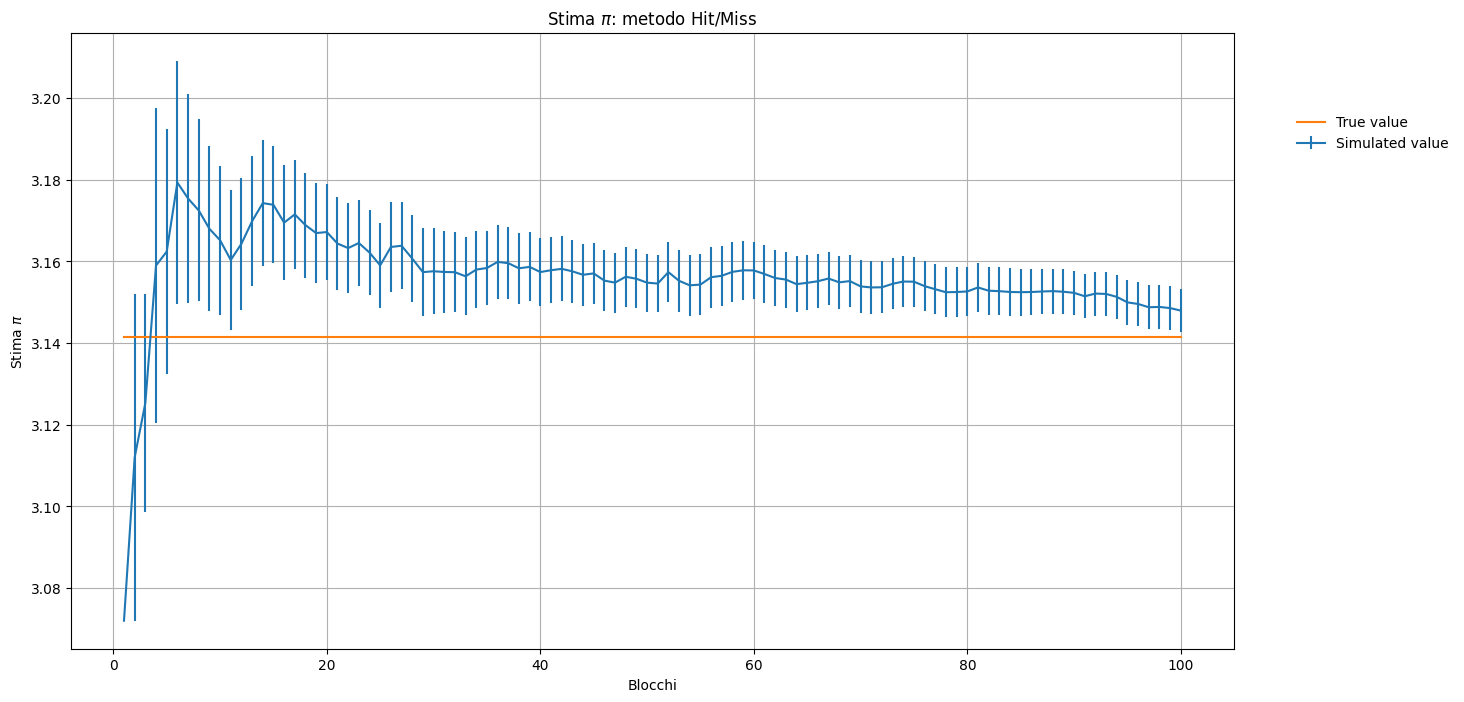

In [42]:
#Importo da file quanto calcolato mediante codice C++
pi_prog, devpi_prog = np.loadtxt("ESERCIZIO_3/HitMiss.dat", unpack=True)
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

N = 100
n_throws = 100000

x = np.arange(1, N+1, 1)


#Grafico quanto importato da file
plt.errorbar(x,pi_prog,yerr=devpi_prog, label = 'Simulated value')
plt.plot(x, np.array([math.pi for i in range(0, len(x))]), label = 'True value')
plt.legend(loc=(1.05, 0.8), frameon=False)

plt.xlabel('Blocchi')
plt.ylabel(r'Stima $\pi$')
plt.title(r'Stima $\pi$: metodo Hit/Miss')
plt.grid(True)

print("Stima finale: " + str(round(pi_prog[99], 5)) + " +/- " + str(round(devpi_prog[99], 5)))
plt.show()

I risultati sono compatibili a due sigma: il metodo è meno accurato di quello proposto dal Conte di Buffon.